In [19]:
# 1. Go through the same steps, but this time generate a new model use the log of brain and body,
# which we know generated a much better distribution and cleaner set of data. Compare the results
# to the original model. Remember that exp() can be used to "normalize" our "logged" values. 
# Note: Make sure you start a new linear regression object!

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

In [21]:
pd.set_option('max_column', 30)
pd.set_option('max_row', 20)
mpl.rc("figure", figsize=(16,8))

In [22]:
df = pd.read_csv('../data/mammals.csv')

In [23]:
df['log_body'] = np.log(df['body'])
df['log_brain'] = np.log(df['brain'])
df

,Name,body,brain,log_body,log_brain
0,Arctic fox,3.385,44.50,1.219354,3.795489
1,Owl monkey,0.480,15.50,-0.733969,2.740840
2,Mountain beaver,1.350,8.10,0.300105,2.091864
3,Cow,465.000,423.00,6.142037,6.047372
4,Grey wolf,36.330,119.50,3.592644,4.783316
5,Goat,27.660,115.00,3.319987,4.744932
6,Roe deer,14.830,98.20,2.696652,4.587006
7,Guinea pig,1.040,5.50,0.039221,1.704748
8,Verbet,4.190,58.00,1.432701,4.060443
9,Chinchilla,0.425,6.40,-0.855666,1.856298


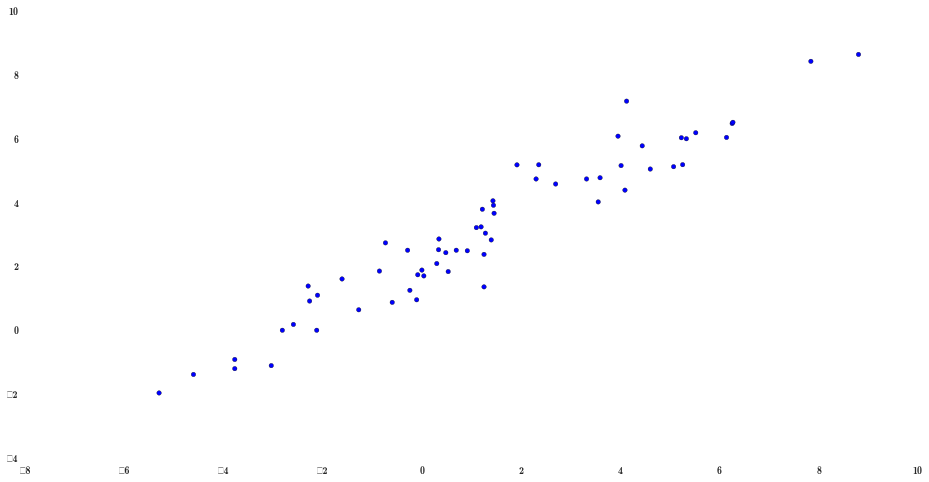

In [24]:
plt.scatter(df['log_body'], df['log_brain'])
plt.show()

In [25]:
regr = linear_model.LinearRegression()

In [26]:
# create x and y as list of log_body and log_brain respectively
# note: sklearn requires matrix (i.e. list in list as parameters)
body = [[x] for x in df['log_body']]
brain = [[x] for x in df['log_brain']]

In [27]:
regr.fit(body, brain)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [28]:
print regr.coef_

[[ 0.75168594]]


In [29]:
regr.score(body, brain)

0.92078371690272554

In [30]:
#SSE calculation
np.sum((regr.predict(body) - brain)**2)

28.922710421460643

In [31]:
str(regr.intercept_)

'[ 2.13478868]'

In [32]:
print("coef: %s" % regr.coef_)
print("SSE: %.2f" % np.mean((regr.predict(body) - brain) ** 2))
print("score: %.2f" % regr.score(body, brain))

coef: [[ 0.75168594]]
SSE: 0.47
score: 0.92


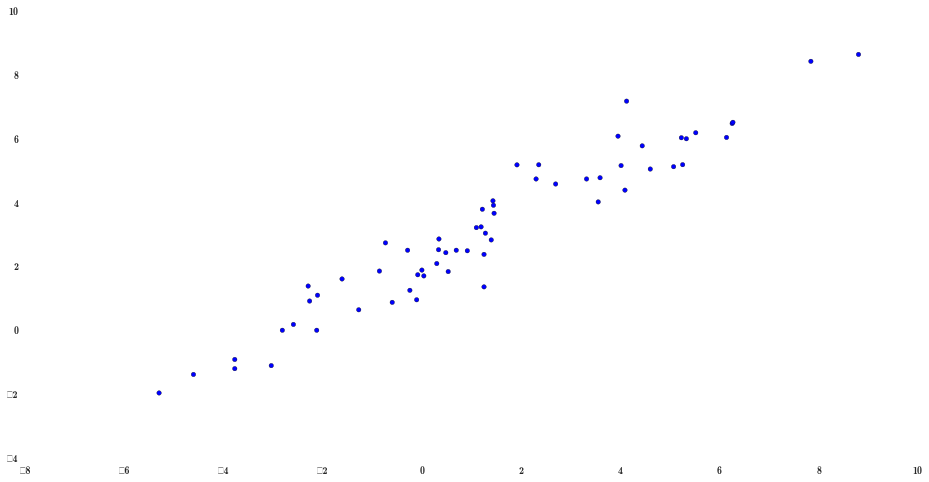

In [33]:
plt.scatter(body, brain)

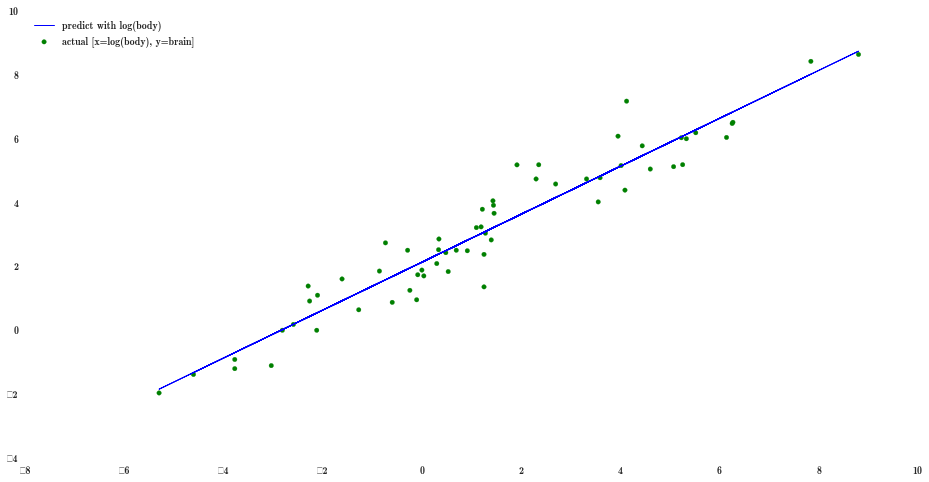

In [34]:
plt.scatter(body, brain, color='green', label='actual [x=log(body), y=brain]')
plt.plot(body, regr.predict(body), color='blue', linewidth=1, label='predict with log(body)')
plt.legend(frameon=False, loc='upper left')
plt.show()

In [35]:
# comparion: 'Log' VS 'Without Log'
# The model with log values handled the long tail distribution; R-square closer to 1; and mean SSE much smaller

In [36]:
# 2. Using your aggregate data compiled from nytimes1-30.csv, write a python script 
# that determines the best model predicting CTR based off of age and gender. 
# Since gender is not actually numeric (it is binary), investigate ways to 
# vectorize this feature. Clue: you may want two features now instead of one.

In [37]:
# Read data

nyt = pd.read_csv('../data/nyagg.csv')

In [38]:
nyt.head()

,Age,Gender,Signed_In,Ctr
0,5,1,1,0.116667
1,6,0,1,0.026042
2,6,1,1,0.040580
3,7,0,1,0.047792
4,7,1,1,0.031965


In [39]:
nyt.describe()

,Age,Gender,Signed_In,Ctr
count,387.000000,387.000000,387,387.000000
mean,54.762274,0.498708,1,0.023383
std,28.233030,0.500646,0,0.018326
min,5.000000,0.000000,1,0.005882
25%,30.500000,0.000000,1,0.010126
50%,55.000000,0.000000,1,0.021209
75%,79.000000,1.000000,1,0.030120
max,107.000000,1.000000,1,0.202381


In [40]:
x = nyt[['Age','Gender']]
y = nyt['Ctr']

In [41]:
regrCTR = linear_model.LinearRegression()

In [42]:
regrCTR.fit(x,y)
print "coef: %s" % regrCTR.coef_
print "SSE: %.5f" % np.mean((regrCTR.predict(x) - y)**2)
print "score: %.5f" % regrCTR.score(x, y)

coef: [ 0.00020009  0.00207276]
SSE: 0.00030
score: 0.09784


In [43]:
# 3. Compare this practice to making two separate models based on Gender, with
# Age as your one feature predicting CTR. How are your results different? Which
# results would you be more confident in presenting to your manager? Why's that?

In [44]:
# model for Gender == male


In [45]:
x = nyt[nyt.Gender==1][['Age', 'Gender']]
y = nyt[nyt.Gender==1][['Ctr']]

In [46]:
regrCTR_m = linear_model.LinearRegression()

In [47]:
regrCTR_m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [48]:
print "coef: %s" %regrCTR_m.coef_
print "score: %.5f" %regrCTR_m.score(x,y)
print "SSE: %.5f" %np.mean((regrCTR_m.predict(x)-y)**2)

coef: [[ 0.00027256  0.        ]]
score: 0.15833
SSE: 0.00031


In [49]:
# mode for Gender = female

In [50]:
x = nyt[nyt.Gender == 0][['Age','Gender']]
y = nyt[nyt.Gender == 0][['Ctr']]


In [51]:
regrCTR_f = linear_model.LinearRegression()

In [52]:
regrCTR_f.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [53]:
print "coef: %s" %regrCTR_f.coef_
print "score: %.5f" %regrCTR_f.score(x,y)
print "SSE: %.5f" %np.mean((regrCTR_f.predict(x) - y)**2)

coef: [[ 0.00012763  0.        ]]
score: 0.04388
SSE: 0.00028


In [54]:
# by comparing the score (R-square):
# the male model got higher score, i.e. the model works a bit better for male
# the female model got lower score, i.e. the model does not work well for female scenario

In [55]:
# 4. Evaluate what data you could still use to improve your nytimes model.
# Consider plotting your model to service your explanations and write a short
# blurb about insights gained and next steps in your "data collection."

In [56]:
from patsy import dmatrices, dmatrix, demo_data

In [57]:
y, X = dmatrices("Ctr ~ Age + Age^2 + Age^3 + np.log(Age)", nyt)

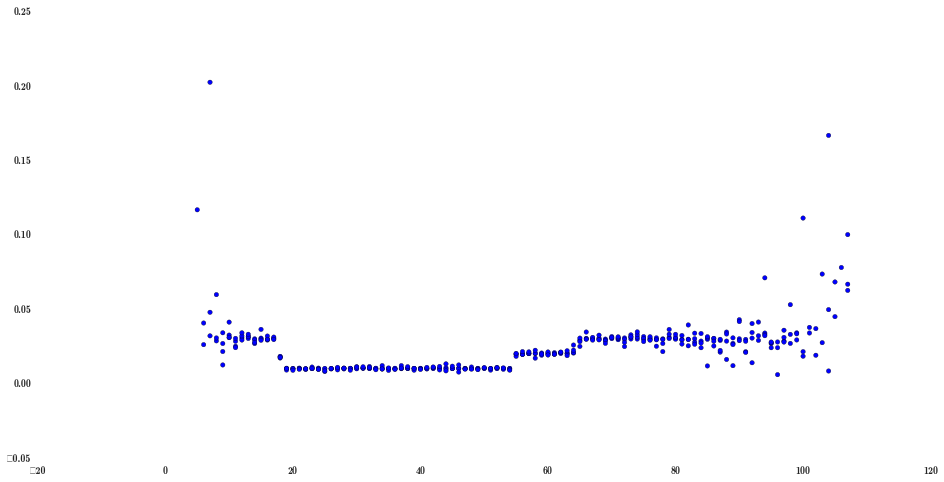

In [58]:
plt.scatter(nyt['Age'], nyt['Ctr'])

In [59]:
# --> long tail distribution --> use natural log of age as feature

In [60]:
nyt['LogAge'] = np.log(nyt['Age'])

In [61]:
nyt.head()

,Age,Gender,Signed_In,Ctr,LogAge
0,5,1,1,0.116667,1.609438
1,6,0,1,0.026042,1.791759
2,6,1,1,0.040580,1.791759
3,7,0,1,0.047792,1.945910
4,7,1,1,0.031965,1.945910


In [62]:
# also include LogAge into the linear model

In [63]:
x = nyt[['Age', 'Gender', 'LogAge']]
y = nyt[['Ctr']]

In [64]:
regrCTR2 = linear_model.LinearRegression()
regrCTR2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [65]:
print "ceof: %s" %regrCTR2.coef_
print "score: %.5f" %regrCTR2.score(x,y)
print "SSE: %.5f" %np.mean((regrCTR2.predict(x) - y)**2)

ceof: [[  0.00000000e+00   1.44871419e-03  -1.89683547e-05  -1.07185048e-04
   -4.88350532e-02]]


ValueError: shapes (387,3) and (5,1) not aligned: 3 (dim 1) != 5 (dim 0)

In [ ]:
# --> much higher score --> this model better explain the actual observations

In [ ]:
# plot

In [ ]:
age_f = nyt[nyt.Gender==0]['Age']
ctr_f = nyt[nyt.Gender==0]['Ctr']
age_m = nyt[nyt.Gender==1]['Age']
ctr_m = nyt[nyt.Gender==1]['Ctr']

plt.scatter(age_f, ctr_f, color='r', alpha=0.5, label='actual (female)')
plt.scatter(age_m, ctr_m, color='g', alpha=0.5, label='actual (male)')
nyt = nyt.sort(['Age','Gender'])
age_f = nyt[nyt.Gender==0]['Age']
X_f = nyt[nyt.Gender==0][['Age','LogAge','Gender']].values
age_m = nyt[nyt.Gender==1]['Age']
X_m = nyt[nyt.Gender==1][['Age','LogAge','Gender']].values
plt.plot(age_f, regrCTR2.predict(X_f), color='r', linewidth=3,
         label='predict (female)')
plt.plot(age_m, regrCTR2.predict(X_m), color='g', linewidth=3,
         label='predict (male)')

plt.legend(frameon=False, loc='upper left')
plt.show()

In [ ]:
logX = nyt[['LogAge', 'Gender']]


In [ ]:
regrCTR3 = linear_model.LinearRegression()
regrCTR3.fit(logX,y)

In [ ]:
plt.scatter(logX, y, color='green', label='actual [x=log(age), y=Ctr]')
plt.plot(logX, regrCTR3.predict(logX),color='r', linewidth = 3, label='predict with Log(age)')
plt.legend(frameon=False, loc='upper left')
plt.show()